## importing dependencies 



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

ModuleNotFoundError: No module named 'sklearn'

### importing the training data of GOOG historical prices

In [2]:
data = pd.read_csv('trainData.csv') 


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


## choosing the close column 


In [4]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce') #turning the Close column to numeric
data = data.dropna() #romeving the NA values
data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [5]:
data.iloc[:,4:5]

,Close
0,663.59
1,666.45
2,657.21
3,648.24
4,620.76
...,...
1253,789.91
1254,791.55
1255,785.05
1256,782.79


In [6]:
trainData = data.iloc[:,4:5].values #selecting only the closing prices for training
trainData

array([[663.59],
       [666.45],
       [657.21],
       ...,
       [785.05],
       [782.79],
       [771.82]])

## scaling the values in the range of 0-1 for best preformances 

In [7]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

NameError: name 'MinMaxScaler' is not defined

## preparing the data for LSTM
 since its a time series problem we took 60 as timestep for our learning : given *60 closing values* as an input data the *61st value* is our output

In [8]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [9]:
X_train

array([[663.59, 666.45, 657.21, ..., 647.55, 645.25, 653.96],
       [666.45, 657.21, 648.24, ..., 645.25, 653.96, 646.63],
       [657.21, 648.24, 620.76, ..., 653.96, 646.63, 639.48],
       ...,
       [772.56, 776.43, 776.47, ..., 791.26, 789.91, 791.55],
       [776.43, 776.47, 776.86, ..., 789.91, 791.55, 785.05],
       [776.47, 776.86, 775.08, ..., 791.55, 785.05, 782.79]])

In [10]:
y_train

array([646.63, 639.48, 645.15, ..., 785.05, 782.79, 771.82])

ps : LSTM take a 3D tensor (seq_len,timestep,batch_size)

In [11]:
X_train

array([[663.59, 666.45, 657.21, ..., 647.55, 645.25, 653.96],
       [666.45, 657.21, 648.24, ..., 645.25, 653.96, 646.63],
       [657.21, 648.24, 620.76, ..., 653.96, 646.63, 639.48],
       ...,
       [772.56, 776.43, 776.47, ..., 791.26, 789.91, 791.55],
       [776.43, 776.47, 776.86, ..., 789.91, 791.55, 785.05],
       [776.47, 776.86, 775.08, ..., 791.55, 785.05, 782.79]])

In [12]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

## building the model 

In [13]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

NameError: name 'Sequential' is not defined

In [14]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

NameError: name 'model' is not defined

### ploting the training loss


In [15]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

NameError: name 'hist' is not defined

### testing the model on new data


In [16]:
print(len(inputClosing_scaled))
inputClosing_scaled

NameError: name 'inputClosing_scaled' is not defined

In [17]:
testData = pd.read_csv('GOOG.csv') #importing the test data
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce') #turning the close column to numerical type
testData = testData.dropna() #droping the NA values
testData = testData.iloc[:,4:5] #selecting the closing prices for testing
y_test = testData.iloc[60:,0:].values #selecting the labels 
y_test[0:10]

array([[1055.810059],
       [1093.390015],
       [1082.400024],
       [1066.150024],
       [1038.630005],
       [1036.050049],
       [1043.660034],
       [1064.709961],
       [1061.48999 ],
       [1020.      ]])

In [18]:
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled[0:10]

NameError: name 'sc' is not defined

In [19]:
inputClosing_scaled.shape
X_test = []
length = len(testData)
testData

NameError: name 'inputClosing_scaled' is not defined

In [20]:
length

NameError: name 'length' is not defined

In [21]:
timestep

NameError: name 'timestep' is not defined

In [22]:
timestep = 60
for i in range(timestep,length): #doing the same preivous preprocessing 
    X_test.append(inputClosing_scaled[i-timestep:i,0])
print(len(X_test))
X_test[0:3]

NameError: name 'length' is not defined

In [23]:
X_test = np.array(X_test)
X_test

NameError: name 'X_test' is not defined

In [24]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test

NameError: name 'X_test' is not defined

In [25]:
y_pred = model.predict(X_test) #predicting the new values

NameError: name 'model' is not defined

In [26]:
predicted_price = sc.inverse_transform(y_pred) #inversing the scaling transformation for ploting 

NameError: name 'sc' is not defined

### ploting the results

NameError: name 'predicted_price' is not defined

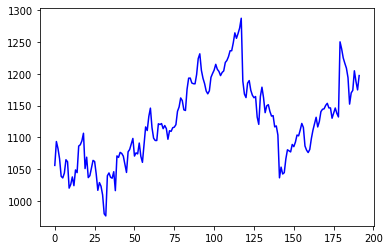

In [27]:
plt.plot(y_test, color = 'blue', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.title('GOOG stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()